# Testing and regularization

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/polynomial_regression

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 11.20 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/polynomial_regression


In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

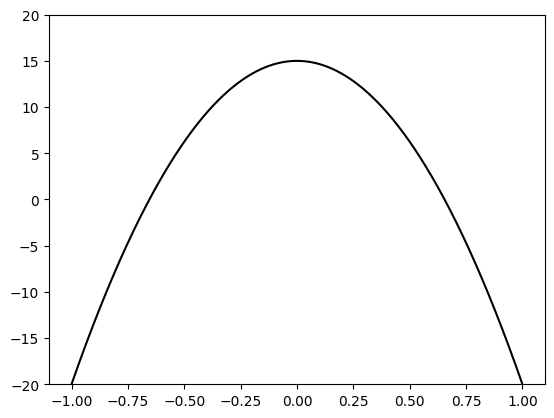

In [3]:
# Our original polynomial is -35x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [24]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

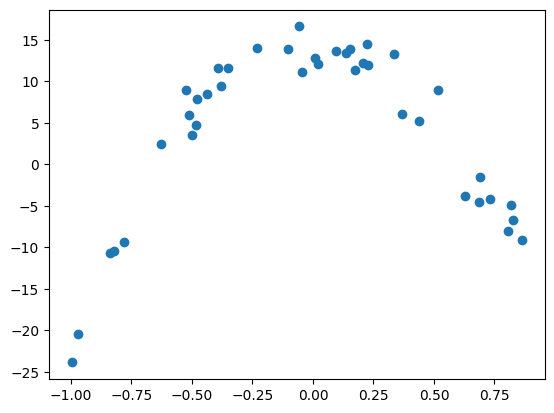

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
for datasample in zip(X,Y):
    print(datasample)

(0.6888437030500962, -1.503313676546703)
(-0.4821664994140733, 4.776223391096098)
(0.02254944273721704, 12.087957039273702)
(-0.3933745478421451, 11.552655381342872)
(-0.04680609169528838, 11.13939451533042)
(0.009373711634780513, 12.810729063756577)
(-0.43632431120059234, 8.437955069843738)
(-0.4989873172751189, 3.511211911084044)
(0.8194925119364802, -4.879955934160179)
(0.8043319008791654, -8.0368585173616)
(-0.37970486136133474, 9.412786903432224)
(0.36796786383088254, 6.014161594638752)
(-0.055714569094573285, 16.612588226930765)
(0.2217739468876032, 14.540743210654112)
(0.8260221064757964, -6.653701461777612)
(0.7306198555432801, -4.157483878852887)
(-0.47901537921608117, 7.82406268607659)
(-0.9719165996719621, -20.435354443047032)
(0.43940937280790826, 5.238271435416371)
(0.3363064024637017, 13.258006206843095)
(-0.9977143613711434, -23.858802994572372)
(-0.512178246225736, 5.980815567451724)
(-0.3495912745052199, 11.6168873009973)
(0.13502148124134372, 13.415138003037914)
(-0.5

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [31]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    ## TODO ##
    #use sklearn (PolynomialFeatures method)
    X = X.reshape(-1,1)
    poly = PolynomialFeatures(degree =polyDegree,include_bias=False )
    X = poly.fit_transform(X)
    return X

X_poly=addPoly(X,200)

In [32]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[-5.67491698e-002  3.22046827e-003 -1.82758901e-004  1.03714159e-005
 -5.88569242e-007  3.34008159e-008 -1.89546857e-009  1.07566268e-010
 -6.10429640e-012  3.46413753e-013 -1.96586929e-014  1.11561450e-015
 -6.33101967e-017  3.59280111e-018 -2.03888480e-019  1.15705020e-020
 -6.56616381e-022  3.72624345e-023 -2.11461222e-024  1.20002488e-025
 -6.81004158e-027  3.86464206e-028 -2.19315228e-029  1.24459571e-030
 -7.06297735e-032  4.00818101e-033 -2.27460945e-034  1.29082198e-035
 -7.32530756e-037  4.15705123e-038 -2.35909206e-039  1.33876516e-040
 -7.59738114e-042  4.31145072e-043 -2.44671249e-044  1.38848903e-045
 -7.87955995e-047  4.47158486e-048 -2.53758728e-049  1.44005972e-050
 -8.17221934e-052  4.63766663e-053 -2.63183731e-054  1.49354582e-055
 -8.47574856e-057  4.80991694e-058 -2.72958793e-059  1.54901849e-060
 -8.79055134e-062  4.98856491e-063 -2.83096917e-064  1.60655150e-065
 -9.11704640e-067  5.17384814e-068 -2.93611587e-069  1.66622138e-070
 -9.45566800e-072  5.366

## Splitting data into training and testing

In [33]:
from sklearn.model_selection import train_test_split
## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing
X_train, X_test, y_train, y_test =train_test_split(X_poly,Y,test_size=.2,train_size=.8)

In [34]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

In [35]:
from sklearn.linear_model import LinearRegression
## TODO ##
# use sklearn linear regression to fit the data

model_no_reg =LinearRegression().fit(X_train,y_train)

Training error (rmse): 0.2241467046469794
Testing error (rmse): 83477.05603938756


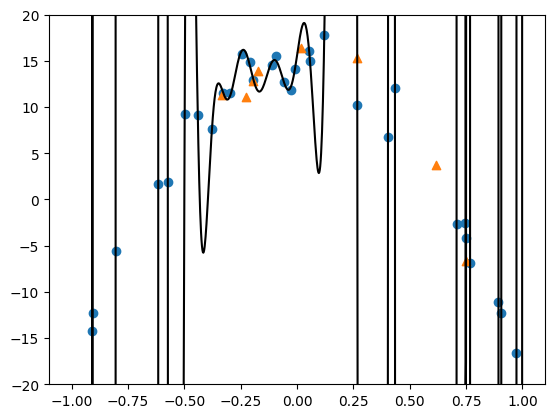

Polynomial coefficients
[15.532121762276132, 164.2276691309099, 329.74385211155584, -55158.11085073287, -354060.72823890136, 3652990.7311715297, 32896011.112465523, -31989229.705841914, -803639094.781495, -759702076.8688952, 8201429904.405628, 14000697203.040987, -40951324493.72031, -87323841715.67816, 104310067331.24176, 244665273136.4118, -133967671591.35759, -265552835206.42227, 81216648627.03972, -63471033410.97738, -5676528358.733732, 200846629146.7857, -51694093489.91029, 140610934908.48212, 4371705177.377595, -40911062621.660736, 50520706259.64858, -144114959758.514, 45537902805.424934, -135934220524.87262, 12840345771.760723, -66195697005.97406, -17913326049.351135, 11948717144.473667, -33731066197.548393, 68886666093.51689, -35283175298.153046, 96347837371.99297, -28448690051.478714, 98060699124.71384, -18841977007.56801, 82152896369.31647, -9931836017.218298, 56857065771.88567, -3129031097.2588806, 28696088412.110744, 1466404205.46345, 2078744973.4617777, 4367659355.831558, -

In [36]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [39]:
from sklearn import linear_model
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data

model_L1_reg =linear_model.Lasso().fit(X_train,y_train)

Training error (rmse): 3.5167544972374607
Testing error (rmse): 3.197637305485493


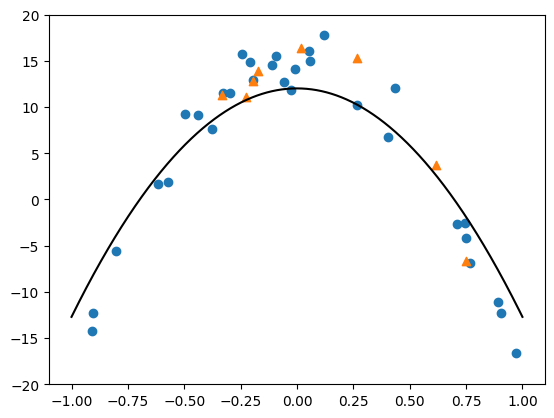

Polynomial coefficients
[12.021396535174102, -0.0, -24.726082925934477, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0

In [40]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [41]:
from sklearn import linear_model
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data

model_L2_reg =linear_model.Ridge().fit(X_train,y_train)

Training error (rmse): 2.7654402733620738
Testing error (rmse): 3.067616080251932


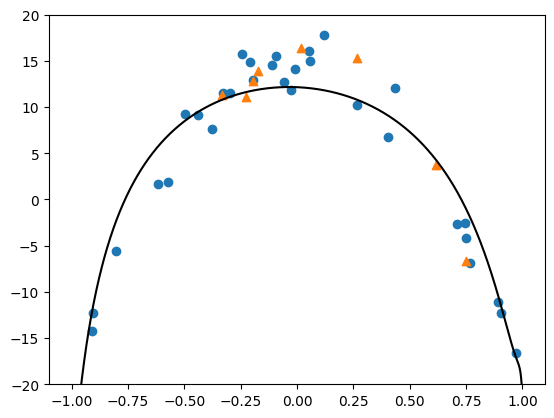

Polynomial coefficients
[12.152657765518054, -1.0152334855589293, -14.540353469130459, -0.49147673174226003, -8.568184159380852, -0.055015410078022464, -5.184016392932543, 0.3355382238778697, -3.273811855788198, 0.5661167637843714, -2.1391049610951924, 0.6646190342517162, -1.4327014187721445, 0.6815738462626132, -0.9746931851366413, 0.6551788926762944, -0.6671861418699223, 0.6089750576350196, -0.4545478331862125, 0.5560785865569832, -0.3039203664592669, 0.5032371528000964, -0.1952020808905494, 0.4535943632552222, -0.11568032419167978, 0.40836248658597685, -0.05705397623624475, 0.367774080830075, -0.013732083548494256, 0.3316012675615858, 0.018163894699933347, 0.2994287805347435, 0.0413994630611737, 0.27079146134048115, 0.0579957500075336, 0.2452391774335526, 0.0694618013139277, 0.22236398802387375, 0.0769446790563556, 0.20180839185471927, 0.08132902218099508, 0.18326462735253624, 0.08330487316076884, 0.1664701734028814, 0.0834151251742608, 0.15120201926426713, 0.08208956405113693, 0.13

In [42]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [43]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

,x,y,No reg,L1 reg,L2 reg
0,-0.223966,11.057625,15.738463,10.781122,11.633991
1,-0.331197,11.350117,11.819004,9.309163,10.801401
2,0.017200,16.381547,18.149094,12.014081,12.130890
3,0.618092,3.703577,-236105.057789,2.575109,4.240815
4,-0.195466,12.803597,13.168730,11.076690,11.786438
5,0.266178,15.304202,38.396861,10.269542,10.797988
6,-0.171164,13.910138,11.711931,11.296993,11.895423
7,0.750847,-6.614234,51.030873,-1.918449,-1.056132


### Real Example (Predict fuel efficiency)

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [45]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [46]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### using 50th order

In [47]:
from sklearn import preprocessing

X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X

X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)
scaler=preprocessing.StandardScaler().fit(X_trainPoly)

X_trainPoly=scaler.transform(X_trainPoly)
X_testPoly=scaler.transform(X_testPoly)

##### no regularization

In [48]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression()
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3062.8548221856595


##### lasso regularization

In [49]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.5)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.383251699910778


##### ridge regularization

In [50]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.5)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.210997782920175
